### Testing JLA SN likelihood with emcee and usample routines: check posteriors for $\Omega_0$ and $\Omega_\Lambda$


In [11]:
import numpy as np
from matplotlib import pylab as plt
%matplotlib inline 

from plot_utils import plot_pretty, plot_2d_dist

plot_pretty()

# read files produced by jla_like_us.py
pos = np.load('pos_nielsen_3par_us.npy')
weights = np.load('weights_nielsen_3par_us.npy')
prob = np.load('prob_nielsen_3par_us.npy')

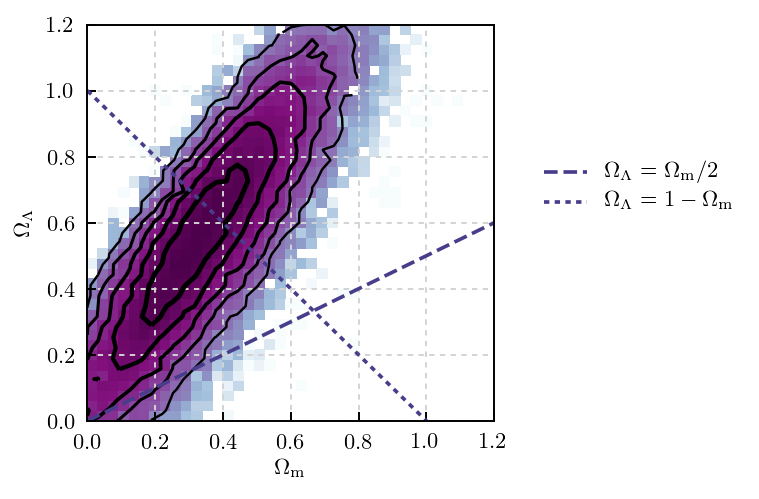

In [12]:
nburn = 1
nthin = 1
x1d = pos[nburn::nthin,-2]; x2d = pos[nburn::nthin,-1]; 

w = weights.ravel()[nburn::nthin]

clevs = (0.683, 0.955, 0.997, 0.9999, 0.999999) # contour levels to plot

fig, ax = plt.subplots(1,1, figsize=(3,3))
plot_2d_dist(x1d, x2d, fig_setup = ax, xlim=[0.,1.2], ylim =[0.,1.2], nxbins=40, nybins=40, 
             clevs=clevs, weights=w, smooth=None, 
             xlabel=r'$\Omega_{\rm m}$', ylabel=r'$\Omega_\Lambda$')

Omgrid = np.linspace(0., 1.2, 100)
Omldec = Omgrid*0.5
Omlflat = 1.0 - Omgrid
ax.plot(Omgrid, Omldec, '--', c='darkslateblue', label=r'$\Omega_\Lambda=\Omega_{\rm m}/2$')
ax.plot(Omgrid, Omlflat, ':', c='darkslateblue', label=r'$\Omega_\Lambda=1-\Omega_{\rm m}$')

ax.grid(linestyle='dotted', c='lightgray')
ax.legend(loc=[1.1,0.5], frameon=False, fontsize=9)
plt.savefig('Om0Ol_zevo_us.pdf', bbox_inches='tight')
plt.show()